# Logistic Regression


In [2]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

## Data

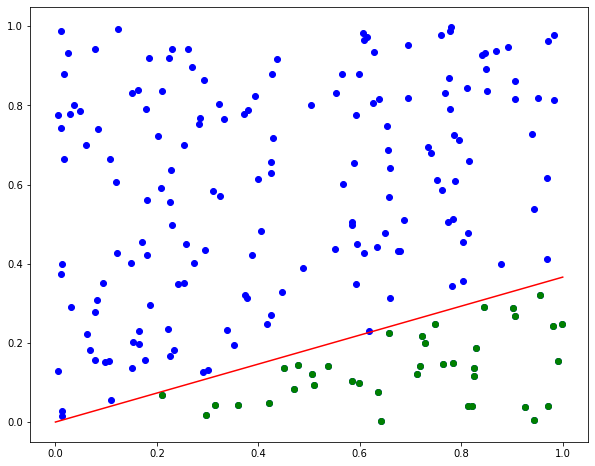

In [24]:
plt.rcParams["figure.figsize"] = (10,8)


# Generate data points
N = 200
x = nr.rand(N, 2)

# Generate line
x_line = np.linspace(0, 1)
m = nr.rand()
f = lambda x : m*x 


plt.plot(x[:, 0], x[:, 1], 'bo')
plt.plot(x_line, f(x_line), 'r')


# Linearly separate the points by the line
y = np.zeros([N,1]);

for i in range(N):
    if(f(x[i,0])>x[i,1]):
        # Point is below line
        y[i] = 1;
        plt.plot(x[i,0],x[i,1],'go')
    else:
        # Point is above line
        y[i] = -1;
        
   

## Logistic Function
![alt text](log_func.png "Title")

In [5]:
import math
def h(x, w, intercept):
    return math.exp(np.dot(w, x)+intercept)/(1+math.exp(np.dot(w, x)+intercept))

## Likelihood Function
![alt text](likelihood.png "Title")

In [6]:
def p(y, x, w, intercept):
    if (y==1):
        return h(x, w, intercept)
    else:
        return 1-h(x, w, intercept)

## Objective Function: Maximum Likelihood
![alt text](obj.png "Title")

In [11]:
def empirical_risks(x,y,weights):
    risk = 0 
    for i in range(len(x)):
        risk += np.log((1 + np.exp(-y[i]*np.dot(weights,x[i]))))
#         risk += np.log(p(y[i], x[i], weights))
    return risk/len(x)

## Loss Function and its Gradient
![alt text](e.png "Title")
![alt text](grad.png "Title")

In [12]:
def grad_e(x,y,weights):
    top = -1*y*x
    bottom =  1+ np.exp(y*np.dot(x,weights))
    return (top/bottom)


## Stochastic Gradient Descent
![alt text](sgd.png "Title")

In [20]:
import random

def stochastic_gradient_descent(X, y, interations, eta):
    
    w = np.zeros(len(X[1]))
    
    array_risks = []
    
    hundredth = 0
    
    for t in range(interations):
        
        hundredth +=1

        index = random.randrange(X.shape[0])
        grad = grad_e(X[index], y[index], w)
        
        w -= eta*grad 
        
        if(hundredth%100==0):
            array_risks.append(empirical_risks(X, y, w))

    return w, array_risks

In [25]:
w, arr_risks = stochastic_gradient_descent(x, y, 10000, 0.1)
w

array([  5.55683873, -14.53014329])

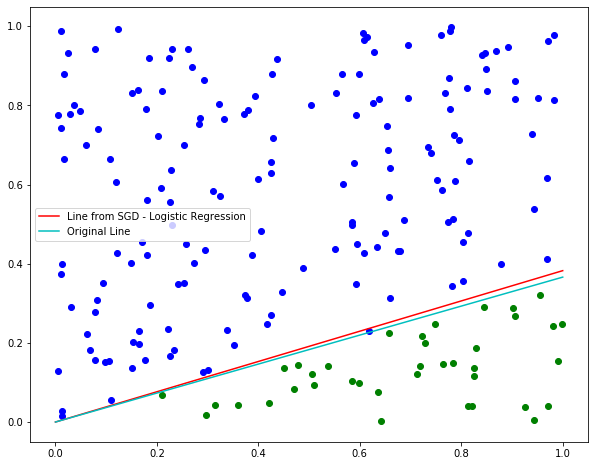

In [27]:
for i in range(N):
    if(f(x[i,0])>x[i,1]):
        # Point is below line
        plt.plot(x[i,0],x[i,1],'go')
    else:
        plt.plot(x[i,0],x[i,1],'bo')


fnew = lambda x : -w[0]/w[1]*x 
plt.plot(x_line, fnew(x_line), 'r', label="Line from SGD - Logistic Regression")
plt.plot(x_line, f(x_line), 'c', label="Original Line")

plt.legend()